In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
# plt.style.use('seaborn')             ggplot;
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'               #解决一些字体显示乱码问题
import warnings; warnings.simplefilter('ignore')       #忽略警告信息；

In [3]:
import numpy as np
import pandas as pd
import tushare as ts

In [4]:
data = ts.get_k_data('600030', start = '2019-01-01', end = '2021-12-31')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [5]:
data.head()

,date,open,close,high,low,volume,code
0,2019-01-10,17.15,16.80,17.15,16.75,2186844.0,600030
1,2019-01-11,16.80,16.97,17.03,16.74,1127695.0,600030
2,2019-01-14,17.11,17.00,17.26,16.97,861108.0,600030
3,2019-01-15,17.04,17.60,17.72,17.01,1805469.0,600030
4,2019-01-16,17.63,17.64,17.75,17.48,1104443.0,600030


In [6]:
data.tail()

,date,open,close,high,low,volume,code
718,2021-12-27,25.81,26.00,26.05,25.64,451896.0,600030
719,2021-12-28,26.10,26.05,26.28,25.84,549142.0,600030
720,2021-12-29,26.13,25.88,26.13,25.83,485993.0,600030
721,2021-12-30,25.85,26.37,26.62,25.85,781346.0,600030
722,2021-12-31,26.46,26.41,26.69,26.39,670511.0,600030


In [7]:
data['SMA_20'] = data['close'].rolling(20).mean()

In [8]:
data['SMA_60'] = data['close'].rolling(60).mean()

In [9]:
data.tail()

,date,open,close,high,low,volume,code,SMA_20,SMA_60
718,2021-12-27,25.81,26.00,26.05,25.64,451896.0,600030,25.8435,25.286167
719,2021-12-28,26.10,26.05,26.28,25.84,549142.0,600030,25.9575,25.289333
720,2021-12-29,26.13,25.88,26.13,25.83,485993.0,600030,26.0400,25.293833
721,2021-12-30,25.85,26.37,26.62,25.85,781346.0,600030,26.1385,25.312000
722,2021-12-31,26.46,26.41,26.69,26.39,670511.0,600030,26.2200,25.323000


<AxesSubplot:>

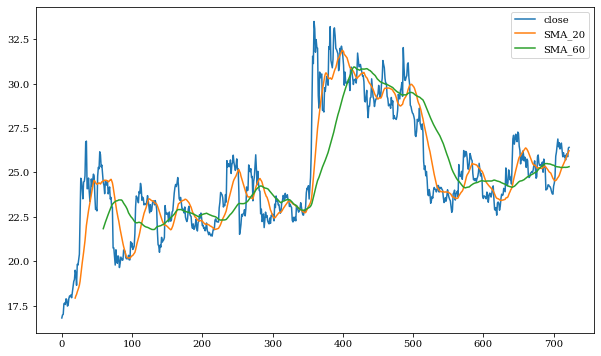

In [10]:
data[['close', 'SMA_20', 'SMA_60']].plot(figsize = (10,6))

In [11]:
#计算股票的return
data['returns'] = np.log(data['close']/data['close'].shift(1))

In [12]:
data['returns_dis'] = data['close'].pct_change()

In [13]:
data.head()

,date,open,close,high,low,volume,code,SMA_20,SMA_60,returns,returns_dis
0,2019-01-10,17.15,16.80,17.15,16.75,2186844.0,600030,NaN,NaN,NaN,NaN
1,2019-01-11,16.80,16.97,17.03,16.74,1127695.0,600030,NaN,NaN,0.010068,0.010119
2,2019-01-14,17.11,17.00,17.26,16.97,861108.0,600030,NaN,NaN,0.001766,0.001768
3,2019-01-15,17.04,17.60,17.72,17.01,1805469.0,600030,NaN,NaN,0.034686,0.035294
4,2019-01-16,17.63,17.64,17.75,17.48,1104443.0,600030,NaN,NaN,0.002270,0.002273


In [14]:
data.tail()

,date,open,close,high,low,volume,code,SMA_20,SMA_60,returns,returns_dis
718,2021-12-27,25.81,26.00,26.05,25.64,451896.0,600030,25.8435,25.286167,0.011995,0.012067
719,2021-12-28,26.10,26.05,26.28,25.84,549142.0,600030,25.9575,25.289333,0.001921,0.001923
720,2021-12-29,26.13,25.88,26.13,25.83,485993.0,600030,26.0400,25.293833,-0.006547,-0.006526
721,2021-12-30,25.85,26.37,26.62,25.85,781346.0,600030,26.1385,25.312000,0.018757,0.018934
722,2021-12-31,26.46,26.41,26.69,26.39,670511.0,600030,26.2200,25.323000,0.001516,0.001517


<AxesSubplot:>

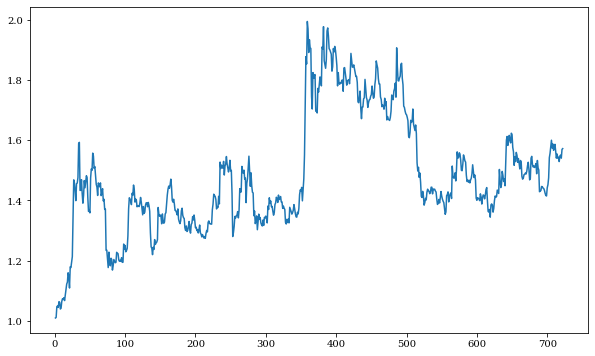

In [15]:
#计算累计收益
data['returns'].cumsum().apply(np.exp).plot(figsize=(10, 6))

<h1>SMA策略</h1>

<h2>准备工作 

In [16]:
data = ts.get_k_data('hs300', start = '2021-01-01', end='2021-12-31')

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [17]:
data = pd.DataFrame(data)   

In [18]:
data.head()

,date,open,close,high,low,volume,code
0,2021-01-04,5212.93,5267.72,5284.43,5190.94,211711382.0,hs300
1,2021-01-05,5245.84,5368.50,5368.50,5234.38,224931159.0,hs300
2,2021-01-06,5386.51,5417.67,5433.47,5341.43,193773444.0,hs300
3,2021-01-07,5428.39,5513.66,5513.66,5413.35,219872080.0,hs300
4,2021-01-08,5526.29,5495.43,5547.47,5442.69,204324956.0,hs300


In [19]:
data.set_index('date', inplace = True)

In [20]:
data.rename(columns={'close': 'price'}, inplace=True)

In [21]:
data.head()

,open,price,high,low,volume,code
date,,,,,,
2021-01-04,5212.93,5267.72,5284.43,5190.94,211711382.0,hs300
2021-01-05,5245.84,5368.50,5368.50,5234.38,224931159.0,hs300
2021-01-06,5386.51,5417.67,5433.47,5341.43,193773444.0,hs300
2021-01-07,5428.39,5513.66,5513.66,5413.35,219872080.0,hs300
2021-01-08,5526.29,5495.43,5547.47,5442.69,204324956.0,hs300


In [22]:
data['SMA_10'] = data['price'].rolling(10).mean() #短线 10日的

In [23]:
data['SMA_60'] = data['price'].rolling(60).mean() #长线 60日的

In [24]:
data.tail()

,open,price,high,low,volume,code,SMA_10,SMA_60
date,,,,,,,,
2021-12-27,4918.15,4919.32,4939.69,4894.16,124100952.0,hs300,4954.285,4910.477167
2021-12-28,4923.69,4955.96,4959.14,4913.60,130457757.0,hs300,4944.911,4911.679333
2021-12-29,4958.65,4883.48,4958.65,4883.48,113587002.0,hs300,4932.669,4912.505167
2021-12-30,4882.16,4921.51,4940.18,4878.65,121617178.0,hs300,4921.347,4913.424000
2021-12-31,4937.46,4940.37,4950.36,4923.14,121313737.0,hs300,4919.908,4913.597833


<AxesSubplot:title={'center':'HS300 stock price | 10 & 60 days SMAs'}, xlabel='date'>

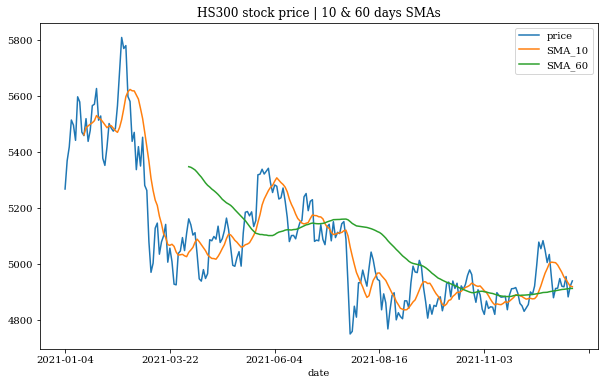

In [25]:
data[['price','SMA_10','SMA_60']].plot(title='HS300 stock price | 10 & 60 days SMAs',
                                       figsize=(10, 6))

<h2>2.策略开发思路

In [26]:
#至关重要的一步
data['position'] = np.where(data['SMA_10'] > data['SMA_60'],1,0)
#如果短线上穿长线即短线大于长线，做多，其余时间，平仓

In [28]:
data.dropna(inplace = True)

<AxesSubplot:title={'center':'Market Postioning'}, xlabel='date'>

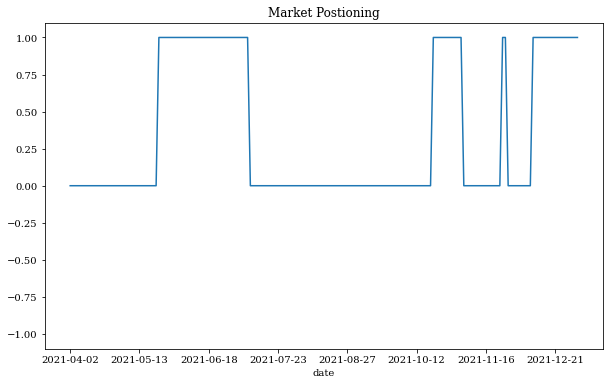

In [30]:
data['position'].plot(ylim=[-1.1, 1.1], title = 'Market Postioning',figsize=(10, 6))

<h2>3.计算策略年化收益并可视化

In [31]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))   #很重要

<AxesSubplot:>

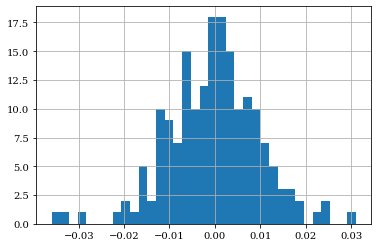

In [32]:
data['returns'].hist(bins=35)

In [33]:
#计算策略带来的回报率
#我们使用的是未来函数
data['strategy'] = data['position'].shift(1)*data['returns']